# **Анализ ЭЭГ**



## Цель данной работы проанализировать снятые данные мозговой активности с лобной и затылочной доли. Построить кратковременное преобразование Фурье с использованием оконных фунций. Посмотреть на преобладающие частоты и максимум амплитуд.

Импортируем все необходимые библиотеки

In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.signal import resample, stft, find_peaks
import matplotlib.colors as colors
import matplotlib.patches as mpatches

Загрузим данные, оставим только необходимые стобцы


In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/DamirJann/neuro/main/EEG_%D0%B7%D0%B0%D1%82%D1%8B%D0%BB%D0%BE%D0%BA.csv", names=["0","1","2","t","x"])
data.head(15)

,0,1,2,t,x
0,0,0,0,1.281835,2.529412
1,0,0,0,1.281835,2.529412
2,1,1,1,1.285890,2.529412
3,2,2,2,1.290609,2.529412
4,3,3,3,1.294721,2.529412
5,4,4,4,1.294721,2.529412
6,5,5,5,1.298285,2.529412
7,6,6,6,1.302462,2.529412
8,7,7,7,1.306853,2.529412
9,8,8,8,1.310564,2.549020


In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/DamirJann/neuro/main/EEG_%D0%B7%D0%B0%D1%82%D1%8B%D0%BB%D0%BE%D0%BA.csv", names=["0","1","2","t","x"])
data = data[['t','x']]
#data['t'] = pd.to_numeric(data['t'])
#data['x'] = pd.to_numeric(data['x'])
data.drop_duplicates(subset="t", inplace=True)
data['t'] = data['t'] - min(data['t'])
y = data["x"]
t = int(max(data["t"]))
freq = int(len(data) / data.iloc[-1,0])

Выведем данные на графике и проведем ресемплирование (50 Гц) и нормализацию данных

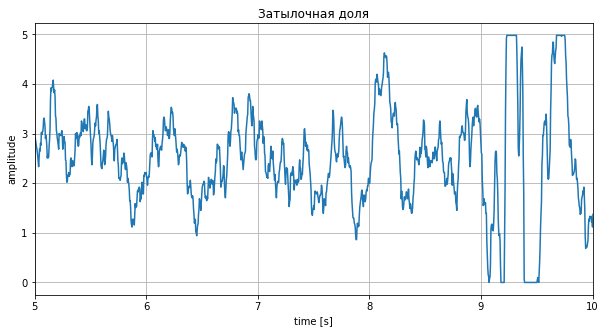

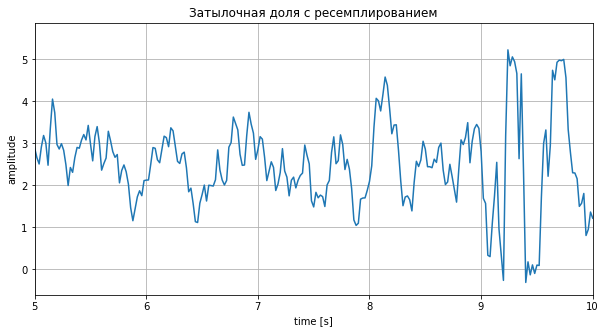

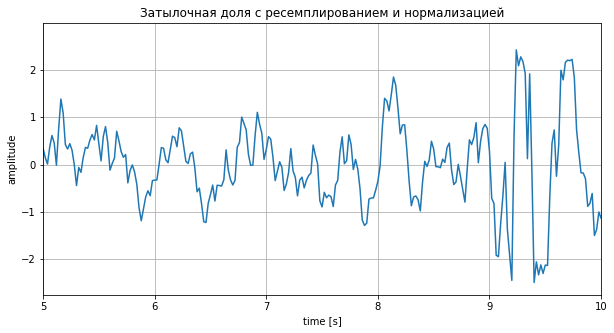

In [ ]:
plt.figure(figsize=(10,5))

plt.plot(np.linspace(0, t, len(data)), y)
plt.xlim(5, 10)
plt.xlabel('time [s]')
plt.ylabel('amplitude')
plt.title('Затылочная доля')
plt.grid()

res_y = resample(y, t*50)

plt.figure(figsize=(10,5))
plt.plot(np.linspace(0, t, t*50), res_y)
plt.xlim(5,10)
plt.xlabel('time [s]')
plt.ylabel('amplitude')
plt.title('Затылочная доля с ресемплированием')
plt.grid()

scaler = preprocessing.StandardScaler()
res_norm_y = scaler.fit_transform(res_y.reshape(-1,1))
plt.figure(figsize=(10,5))
plt.plot(np.linspace(0, t, t*50), res_norm_y)
plt.xlim(5,10)
plt.xlabel('time [s]')
plt.ylabel('amplitude')
plt.title('Затылочная доля с ресемплированием и нормализацией')
plt.grid()

Напишим функцию для построения спектограмы кратковременого преобразования Фурье с использованием различных оконных функций


In [ ]:
def calcSTFT(y, freq, window = 'hann', nperseg = 256):
  
  f, t, Zxx = stft(y.reshape(1,-1), freq, window=window, nperseg = nperseg)

  fig = plt.figure(figsize = (9,5))
  spec = plt.pcolormesh(t*240/50, f, np.abs(Zxx.reshape(len(f), len(t))), shading='gouraud')
  cbar = plt.colorbar(spec)
  ax = fig.axes[0]
  ax.grid(True)
  ax.set_title('STFT Magnitude with window width = ' + str(nperseg))
  fig.show

Построимспектограммы для разных оконных функций

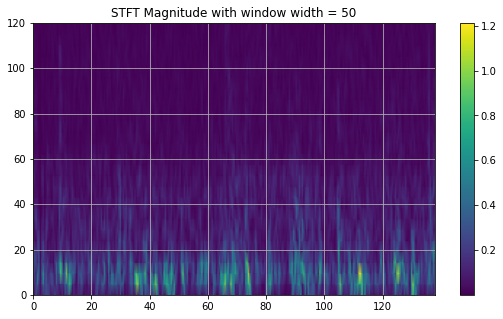

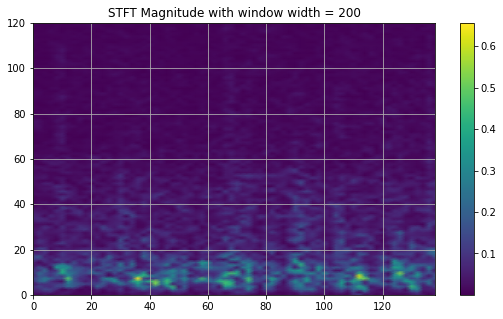

In [ ]:
freq = 240
calcSTFT(res_norm_y, freq, ('kaiser', 3), 50)
calcSTFT(res_norm_y, freq, ('kaiser', 3), 200)


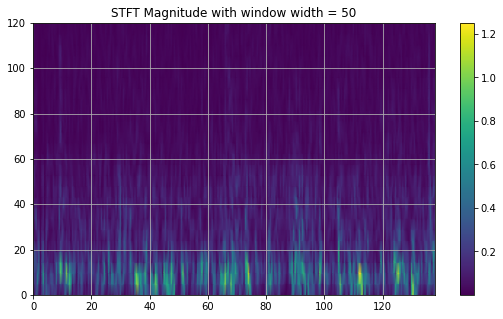

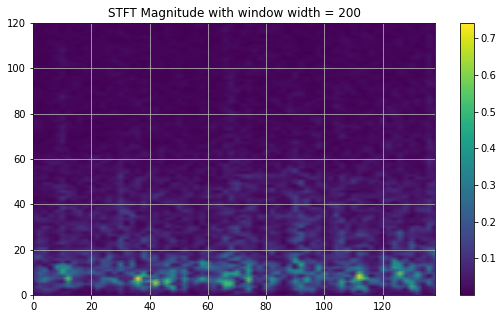

In [ ]:

calcSTFT(res_norm_y, freq, window = 'hamming', nperseg = 50)
calcSTFT(res_norm_y, freq, window = 'hamming', nperseg = 200)

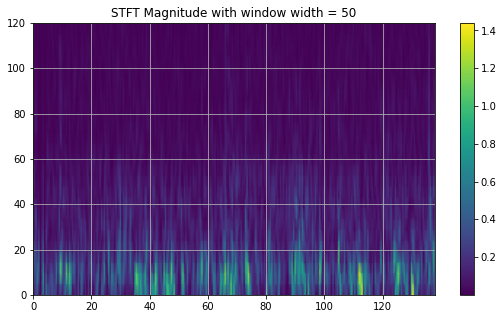

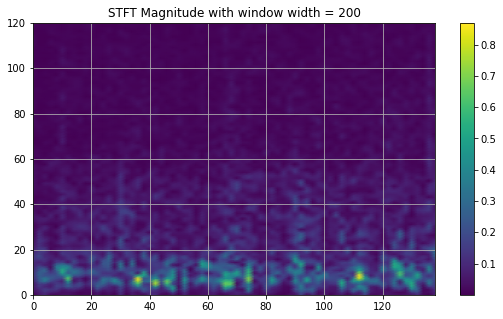

In [ ]:
calcSTFT(res_norm_y, freq, window = 'nuttall', nperseg = 50)
calcSTFT(res_norm_y, freq, window = 'nuttall', nperseg = 200)

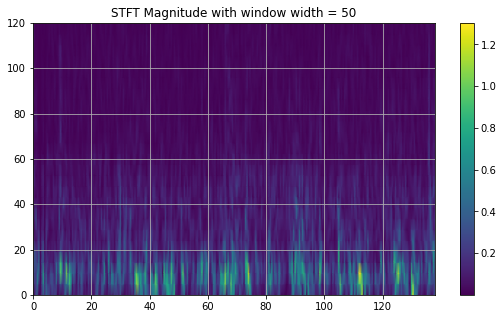

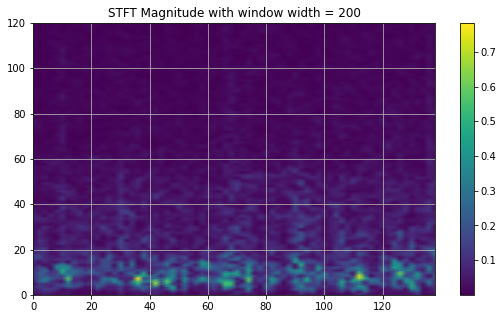

In [ ]:
calcSTFT(res_norm_y, freq, nperseg = 50)
calcSTFT(res_norm_y, freq, nperseg = 200)

Использование различных оконных функций не дало существенных результатов, так как временной интервал оказался достаточно маленьким для полноценного анализа. 

Сложно определить преобладание частот на различных отрезках времени. Исходя из графиков с большой шириной окна, можно сказать, что преобладают низкие частот в районе 10-13 Гц. Это примерно альфа ритмы

Из графика с узкой шириной окна мы так же не можем определить момент возникновения высокоамплитудной волны. Можно выделить несколько участков: 36-37 с, 72-75с, и 111-113с. Давайте посмотрим на эти моменты поближе.

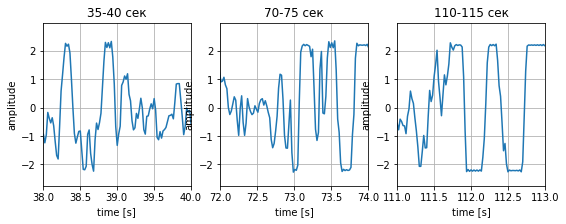

In [ ]:

plt.figure(figsize=(9,3))

plt.subplot(1,3,1)
plt.plot(np.linspace(0, t, t*50), res_norm_y)
plt.xlim(38,40)
plt.xlabel('time [s]')
plt.ylabel('amplitude')
plt.title('35-40 сек')
plt.grid()


plt.subplot(1,3,2)
plt.plot(np.linspace(0, t, t*50), res_norm_y)
plt.xlim(72,74)
plt.xlabel('time [s]')
plt.ylabel('amplitude')
plt.title('70-75 сек')
plt.grid()

plt.subplot(1,3,3)
plt.plot(np.linspace(0, t, t*50), res_norm_y)
plt.xlim(111,113)
plt.xlabel('time [s]')
plt.ylabel('amplitude')
plt.title('110-115 сек')
plt.grid()

Проделаем тоже самое для лобной доли.

In [ ]:
data2 = pd.read_csv("https://raw.githubusercontent.com/DamirJann/neuro/main/EEG_%D0%BB%D0%BE%D0%B1.csv", names=["0","1","2","t","x"])
data2 = data2[['t','x']]
data2.drop_duplicates(subset="t", inplace=True)
data2['t'] = data2['t'] - min(data2['t'])
yl = data2["x"]
tl = int(max(data2["t"]))

Посмотрим на сырые данные:

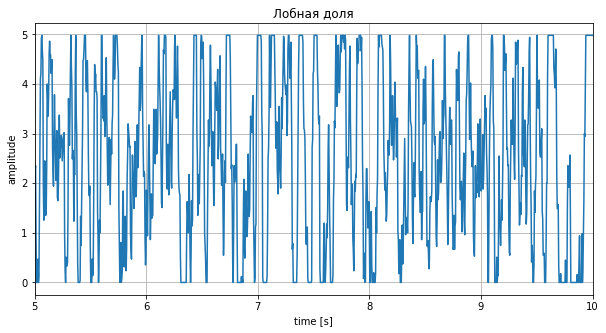

In [ ]:
plt.figure(figsize=(10,5))

plt.plot(np.linspace(0, t, len(data2)), yl)
plt.xlim(5, 10)
plt.xlabel('time [s]')
plt.ylabel('amplitude')
plt.title('Лобная доля')
plt.grid()

Уменьшим частоту для более точного анализа.

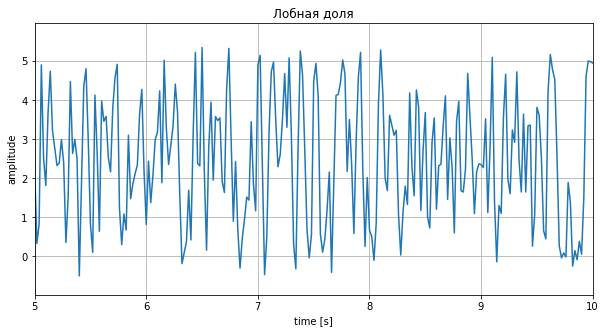

In [ ]:
res_yl = resample(yl, t*50)

plt.figure(figsize=(10,5))
plt.plot(np.linspace(0, t, t*50), res_yl)
plt.xlim(5,10)
plt.xlabel('time [s]')
plt.ylabel('amplitude')
plt.title('Лобная доля')
plt.grid()

А также произведем нормализацию с помощью StandartScaler.

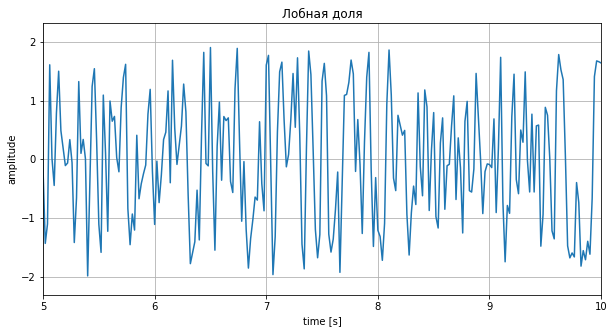

In [ ]:
res_norm_yl = scaler.fit_transform(res_yl.reshape(-1,1))
plt.figure(figsize=(10,5))
plt.plot(np.linspace(0, t, t*50), res_norm_yl)
plt.xlim(5,10)
plt.xlabel('time [s]')
plt.ylabel('amplitude')
plt.title('Лобная доля')
plt.grid()

Произведем кратковременное преобразование Фурье. Из предыдущей обработки видно, что выбор оконной функции не повлияло на конечный результат. Выберем оконную функцию по умолчанию = hann

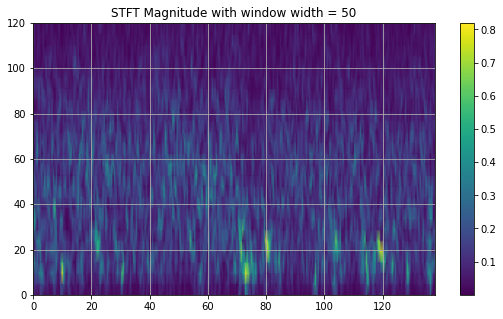

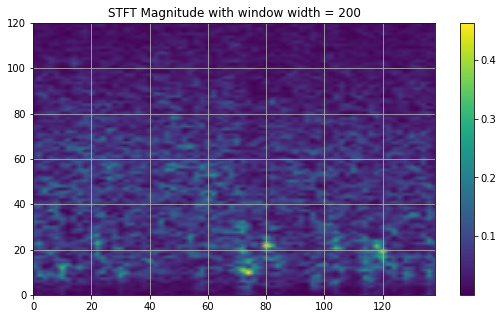

In [ ]:
calcSTFT(res_norm_yl, freq, ('kaiser', 3), 50)
calcSTFT(res_norm_yl, freq, ('kaiser', 3), 200)

По данным графикам сложно сказать какие частоты преобладают. скорее высокачастотные. Видна сильная мозговая активность. 
Можно выделить участки с максимальной амплитудой: 36-37 с, 40-42с, 58-60с. Посмотрим на них поближе.


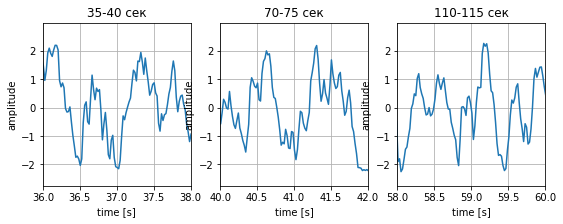

In [ ]:
plt.figure(figsize=(9,3))

plt.subplot(1,3,1)
plt.plot(np.linspace(0, t, t*50), res_norm_y)
plt.xlim(36,38)
plt.xlabel('time [s]')
plt.ylabel('amplitude')
plt.title('35-40 сек')
plt.grid()


plt.subplot(1,3,2)
plt.plot(np.linspace(0, t, t*50), res_norm_y)
plt.xlim(40,42)
plt.xlabel('time [s]')
plt.ylabel('amplitude')
plt.title('70-75 сек')
plt.grid()

plt.subplot(1,3,3)
plt.plot(np.linspace(0, t, t*50), res_norm_y)
plt.xlim(58,60)
plt.xlabel('time [s]')
plt.ylabel('amplitude')
plt.title('110-115 сек')
plt.grid()

# **Анализ ЭМГ**

## Цель данной работы определить момент сокращения мышц


Загрузим данные


In [ ]:
dataemg = pd.read_csv("https://github.com/DamirJann/neuro/blob/main/EMG.csv", names=["2","t","a"])
dataemg = dataemg[['t','a']]
dataemg.drop_duplicates(subset="t", inplace=True)
dataemg['t'] = dataemg['t'] - min(dataemg['t'])
ym = dataemg["a"]
tm = int(max(dataemg["t"]))
freqm = int(len(dataemg) / dataemg.iloc[-1,0])

TypeError: ignored

Произведем ресеплинг и нормализацию

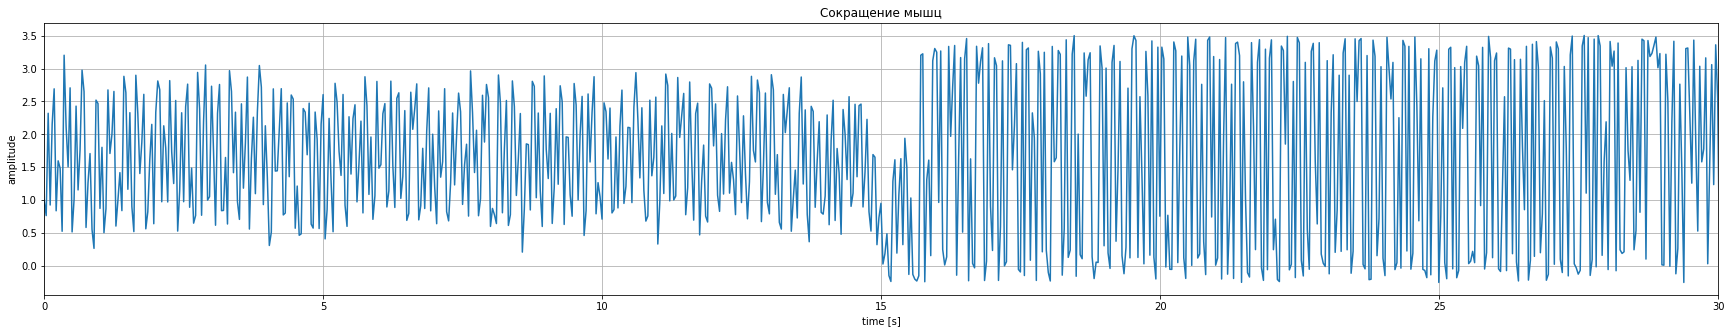

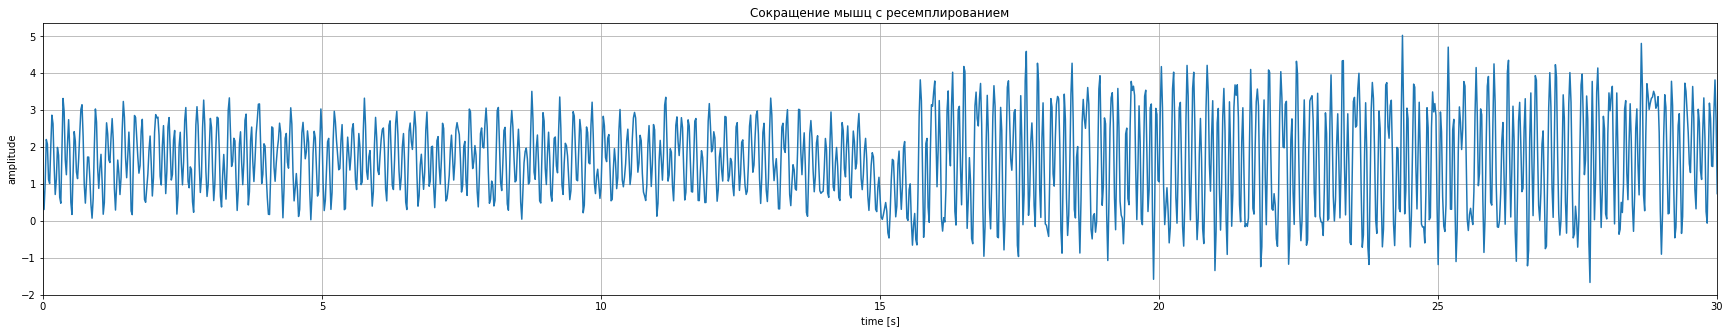

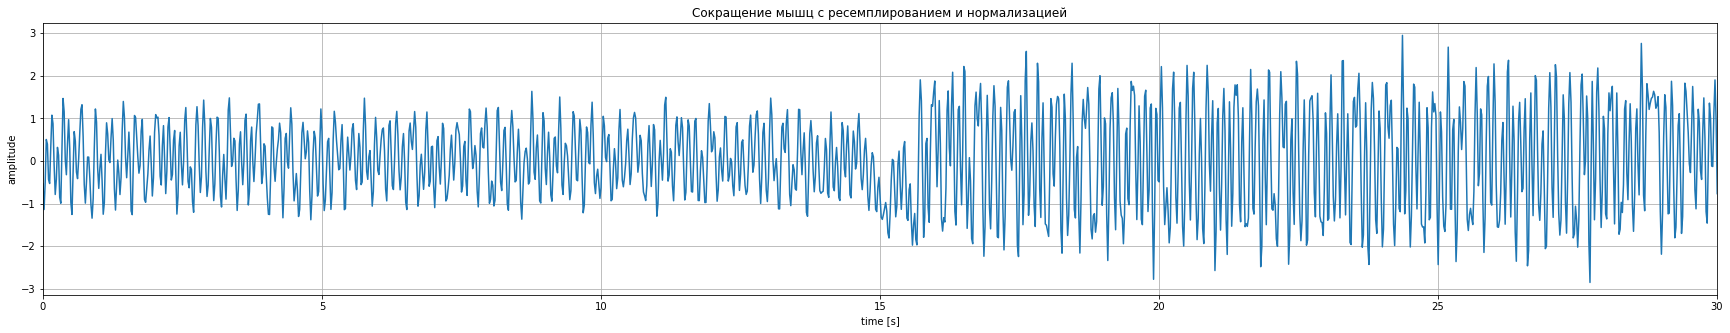

In [ ]:
plt.figure(figsize=(30,5))

plt.plot(np.linspace(0, tm, len(dataemg)), ym)
plt.xlim(0,30)
plt.xlabel('time [s]')
plt.ylabel('amplitude')
plt.title('Сокращение мышц')
plt.grid()

res_ym = resample(ym, tm*50)

plt.figure(figsize=(30,5))
plt.plot(np.linspace(0, tm, tm*50), res_ym)
plt.xlim(0,30)
plt.xlabel('time [s]')
plt.ylabel('amplitude')
plt.title('Сокращение мышц с ресемплированием')
plt.grid()

scaler = preprocessing.StandardScaler()
res_norm_ym = scaler.fit_transform(res_ym.reshape(-1,1))
plt.figure(figsize=(30,5))
plt.plot(np.linspace(0, tm, tm*50), res_norm_ym)
plt.xlim(0,30)
plt.xlabel('time [s]')
plt.ylabel('amplitude')
plt.title('Сокращение мышц с ресемплированием и нормализацией')
plt.grid()

Выведем график и выделим пики с помощью функции find_peaks, чтобы определить моменты сокращения 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Text(0.5, 1.0, 'Моменты сокращения мышц')

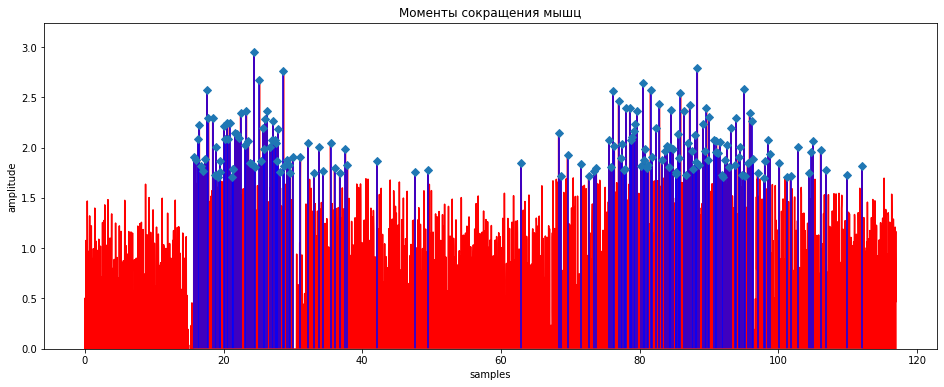

In [ ]:
peaks, _ = find_peaks(res_norm_ym.reshape(res_norm_ym.shape[0]), height=1.7)
color = np.zeros(len(res_norm_ym), dtype=np.int8)
color[peaks] = 1

plt.figure(figsize=(16,6))
plt.plot(np.linspace(0, tm, tm*50),res_norm_ym,color='red')
plt.stem(np.linspace(0, tm, tm*50)[peaks], res_norm_ym[peaks], linefmt='blue', markerfmt='D')
plt.ylim(0,)
plt.xlabel('samples')
plt.ylabel('amplitude')
plt.title('Моменты сокращения мышц')

По графику мы можем видеть моменты, когда мышцы сокращались, а именно период с 18с-30с и 75с-95с

# **Анализ ЭКГ**


Загружаем данные, находим частоту измерения сигнала и ресеплируем сигнал, т.к. измерения проводились не в дискретные моменты времени

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/DamirJann/neuro/main/ECG.csv', names=["0","time","y"])
data = data[['time','y']]
data.drop_duplicates(subset='time', inplace=True)
#начинаем отсчет с 0 сек.
data['time'] = data['time'] - np.min(data['time'])
data = data[0:26900]

freq = int(len(data) / data.iloc[-1,0])
t = int(np.floor(data.iloc[-1,0]))

print('Запись в', data.iloc[-1,0], "секунд содержит ", len(data), "измерений.")
print('Частота: ', freq, 'Гц')

signal = resample(data['y'], t*freq)
signal = scaler.fit_transform(signal.reshape(-1,1))

Запись в 110.18804168 секунд содержит  26900 измерений.
Частота:  244 Гц


Выведем график сигнала

Text(0, 0.5, 'amplitude')

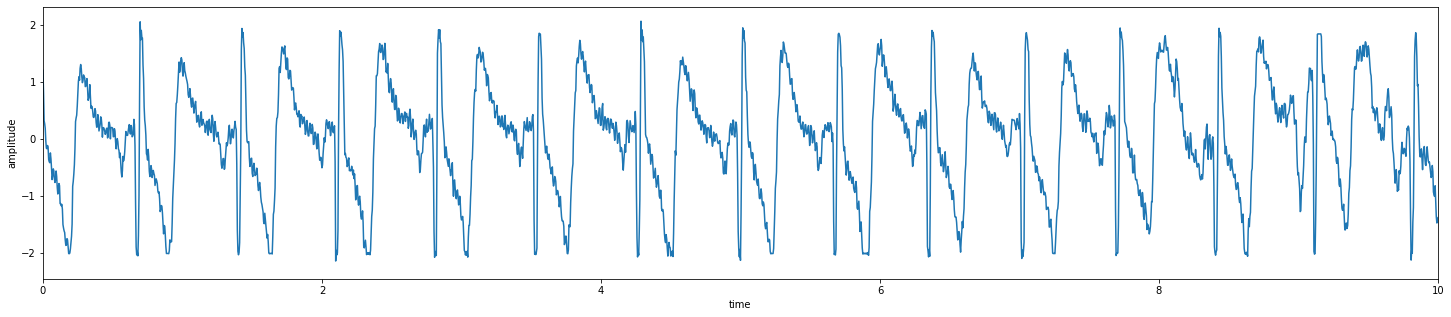

In [ ]:
plt.figure(figsize=(25, 5))
plt.plot(np.linspace(0, t, t*freq), signal)
plt.xlim(0,10)
plt.xlabel('time')
plt.ylabel('amplitude')

С помощью функции find_peaks найдем пики сигнала и определим среднее значение пульса

In [ ]:
peaks, _ = find_peaks(signal.reshape(1,-1)[0], distance=freq//2)
pulse = int(len(peaks)/(t/60))
print('Пульс: ', pulse)

Пульс:  86


Найдем R-R интервалы по найденным пикам и построим пульсограмму




           time       R-R       pulse
0      0.032788  0.663959   90.367003
1      0.696747  0.729535   82.244127
2      1.426283  0.700846   85.610845
3      2.127128  0.717240   83.654026
4      2.844368  0.713141   84.134796
..          ...       ...         ...
153  107.061366  0.721338   83.178719
154  107.782704  0.811506   73.936639
155  108.594210  0.545102  110.071087
156  109.139312  0.577890  103.825919
157  109.717203       NaN         NaN

[158 rows x 3 columns]


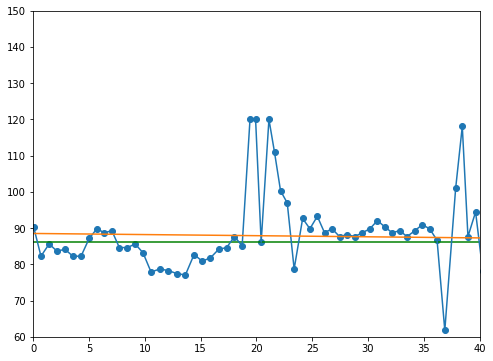

In [ ]:
RR = pd.DataFrame({'time':np.linspace(0, t, t*freq)[peaks]})
RR['R-R'] = RR['time'].shift(-1) - RR['time']
RR['pulse'] = 60/RR['R-R']
print(RR)


from sklearn.linear_model import Lasso
RR.dropna(inplace=True)
y_pred = Lasso().fit(RR['time'].values.reshape(-1,1), RR['pulse']).predict(RR['time'].values.reshape(-1,1))
RR['pred'] = y_pred

plt.figure(figsize=(8,6))
plt.plot(RR['time'], RR['pulse'])
plt.plot(RR['time'], RR['pred'])
plt.scatter(RR['time'], RR['pulse'])
plt.xlim(0,40)
plt.ylim(60,150)
plt.hlines(np.median(RR['pulse'].dropna().values), 0, np.max(RR['time']), 'g')

Построим гистограмму ритмов

Text(0.5, 1.0, 'hist = hist / hist.sum()')

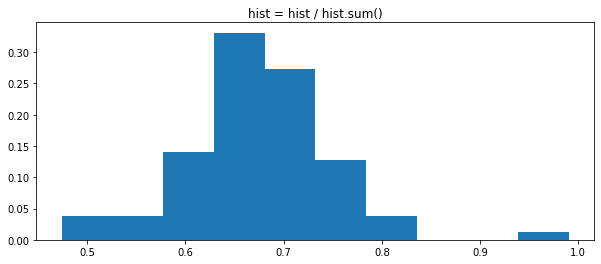

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,4))

hist, bins = np.histogram(RR['R-R'])
ax.bar(bins[:-1], hist.astype(np.float32) / hist.sum(), width=(bins[1]-bins[0]))
ax.set_title('hist = hist / hist.sum()')

Построим скатерограмму

In [ ]:
m0 = RR['R-R'].mode()[0]
y = np.array(RR['R-R'].shift(-1)[0:-1])*1000
x = np.array(RR['R-R'][0:-1])*1000

In [ ]:
width0 = max(y) - min(y)

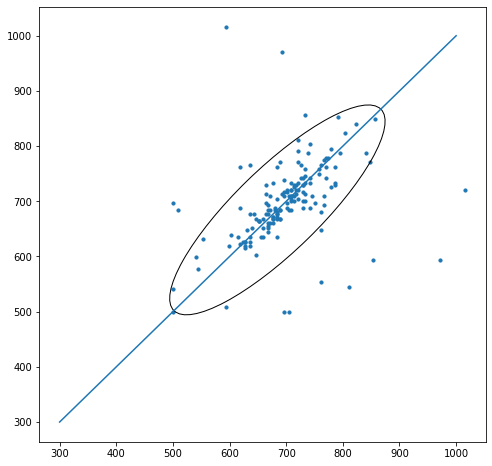

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot([300,1000],[300,1000])
plt.scatter(x,y, s = 10)

#height = количество элементов в столбце с амлитудой
plt.gca().add_patch(mpatches.Ellipse(xy=(m0*1000,m0*1000), width=width0, height = 150, angle = 45, fill = False))

plt.show()

Строим ритмограмму

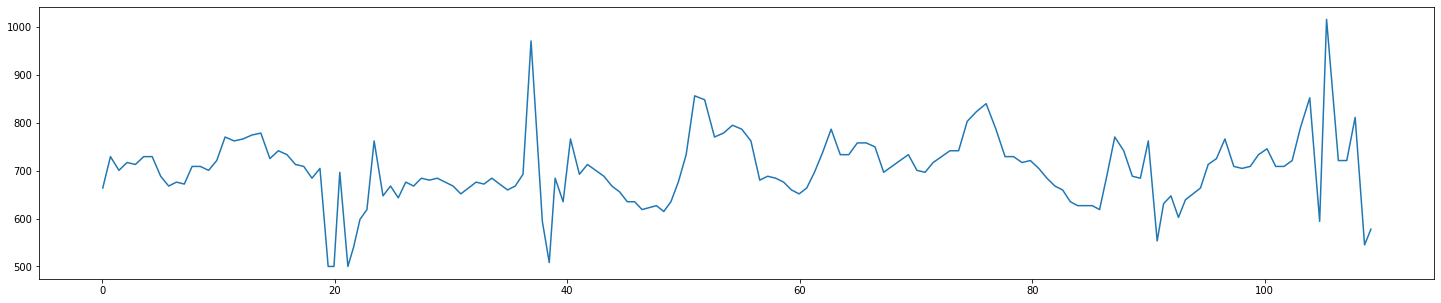

In [ ]:
plt.figure(figsize=(25,5))
plt.plot(RR['time'], RR['R-R']*1000)